In [3]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

from sklearn.model_selection  import train_test_split
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

# Problem Statement
### The proliferation of social media enables people to express their opinions widely online. However, at the same time, this has resulted in the emergence of conflict and hate, making online environments uninviting for users. Although researchers have found that hate is a problem across multiple platforms, there is a lack of models for online hate detection.
### Online hate, described as abusive language, aggression, cyberbullying, hatefulness and many others has been identified as a major threat on online social media platforms. Social media platforms are the most prominent grounds for such toxic behaviour.   
### There has been a remarkable increase in the cases of cyberbullying and trolls on various social media platforms. Many celebrities and influences are facing backlashes from people and have to come across hateful and offensive comments. This can take a toll on anyone and affect them mentally leading to depression, mental illness, self-hatred and suicidal thoughts.    
### Internet comments are bastions of hatred and vitriol. While online anonymity has provided a new outlet for aggression and hate speech, machine learning can be used to fight it. The problem we sought to solve was the tagging of internet comments that are aggressive towards other users. This means that insults to third parties such as celebrities will be tagged as unoffensive, but “u are an idiot” is clearly offensive.
### Our goal is to build a prototype of online hate and abuse comment classifier which can used to classify hate and offensive comments so that it can be controlled and restricted from spreading hatred and cyberbullying. 


In [4]:
train =   pd.read_csv ("train.csv")

In [5]:
train

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [6]:
test =   pd.read_csv ("test.csv")


-	Malignant: It is the Label column, which includes values 0 and 1, denoting if the comment is malignant or not. 
-	Highly Malignant: It denotes comments that are highly malignant and hurtful. 
-	Rude: It denotes comments that are very rude and offensive.
-	Threat: It contains indication of the comments that are giving any threat to someone. 	
-	Abuse: It is for comments that are abusive in nature. 
-	Loathe: It describes the comments which are hateful and loathing in nature.  
-	ID: It includes unique Ids associated with each comment text given.   
-	Comment text: This column contains the comments extracted from various social media platforms. 


In [83]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [84]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comment_text  153164 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


In [85]:
train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [86]:
train.tail()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0
159570,fff46fc426af1f9a,"""\nAnd ... I really don't think you understand...",0,0,0,0,0,0


In [87]:
train.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# checking null datda

In [88]:
train.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

# checking correlation 

In [89]:
corr =   train .corr()
corr

,malignant,highly_malignant,rude,threat,abuse,loathe
malignant,1.000000,0.308619,0.676515,0.157058,0.647518,0.266009
highly_malignant,0.308619,1.000000,0.403014,0.123601,0.375807,0.201600
rude,0.676515,0.403014,1.000000,0.141179,0.741272,0.286867
threat,0.157058,0.123601,0.141179,1.000000,0.150022,0.115128
abuse,0.647518,0.375807,0.741272,0.150022,1.000000,0.337736
loathe,0.266009,0.201600,0.286867,0.115128,0.337736,1.000000


<AxesSubplot:>

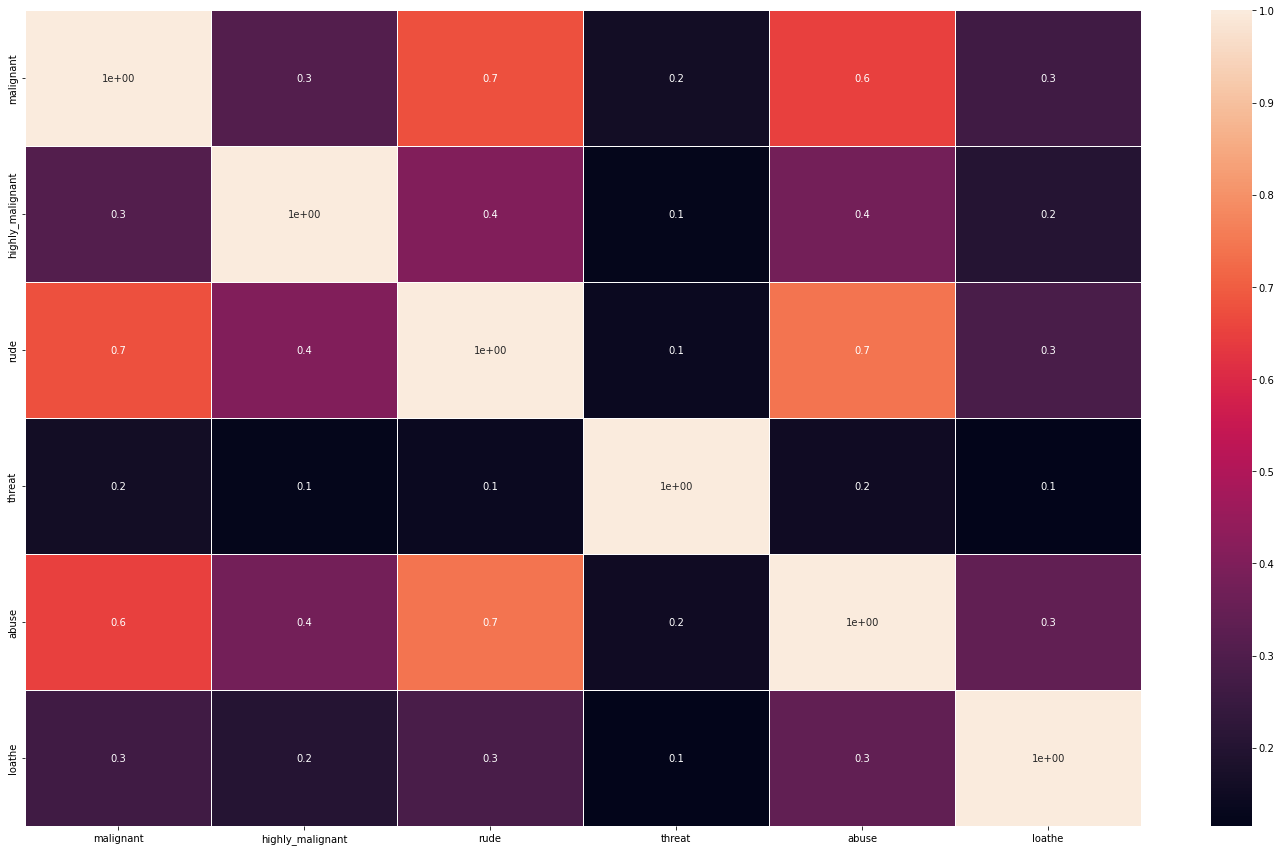

In [90]:
plt.figure(figsize =  (25,15))
sns.heatmap(corr,annot = True,linewidth = 0.5 ,linecolor = "white", fmt ='0.1')


### data   are not related to each other 

#  checking skewness

In [91]:

train.skew()

malignant            2.745854
highly_malignant     9.851722
rude                 3.992817
threat              18.189001
abuse                4.160540
loathe              10.515923
dtype: float64

## skewness is not much 

In [92]:
train.columns

Index(['id', 'comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe'],
      dtype='object')

In [23]:

col = ["malignant" , "highly_malignant" ,"rude" , "threat" ,"abuse"  ,"loathe" ]

malignant
0    144277
1     15294
Name: malignant, dtype: int64


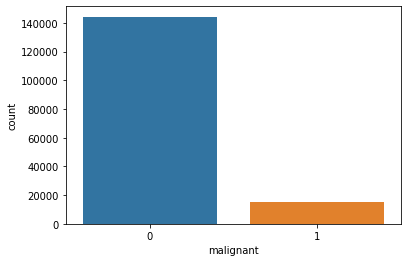

highly_malignant
0    157976
1      1595
Name: highly_malignant, dtype: int64


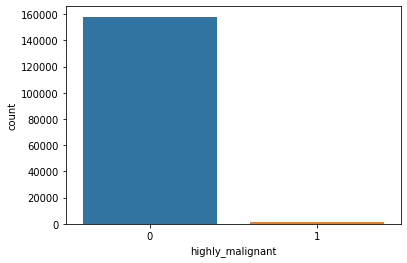

rude
0    151122
1      8449
Name: rude, dtype: int64


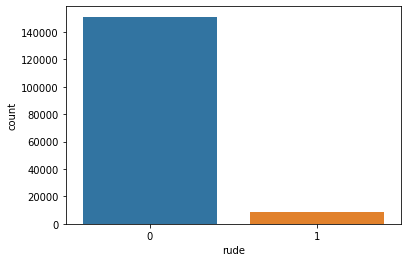

threat
0    159093
1       478
Name: threat, dtype: int64


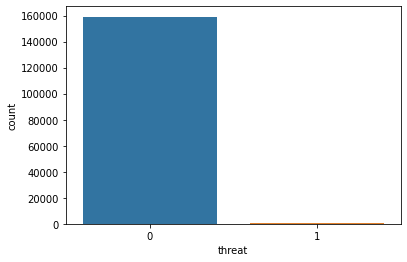

abuse
0    151694
1      7877
Name: abuse, dtype: int64


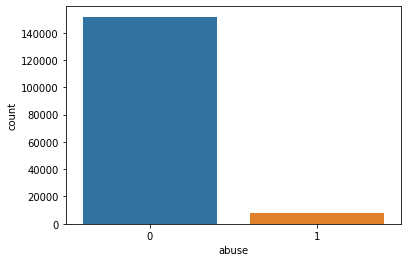

loathe
0    158166
1      1405
Name: loathe, dtype: int64


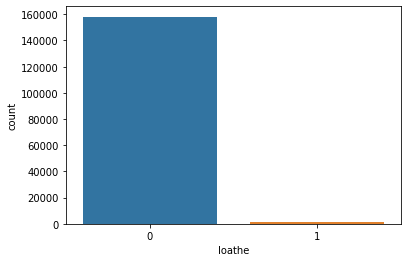

In [94]:
for i in col:
    print(i)
    print (train[i].value_counts())
    sns.countplot(train[i])
    plt.show()
    

## # we can see the highest is malignant comments 

# cleaning training data

In [7]:
train["comment_text"] =  train["comment_text"]. str.lower()

In [8]:
train['comment_text'] = train['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')

In [9]:
train['comment_text'] = train['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

In [10]:
train['comment_text'] = train['comment_text'].str.replace(r'£|\$', 'dollers')


In [11]:

train['comment_text'] = train['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$', "phonenumber" )

In [12]:
train['comment_text'] = train['comment_text'].str.replace(r'\d+(\.\d+)?', 'numbr')


In [13]:
train['comment_text'] = train['comment_text'].str.replace(r'[^\d\s\w]', ' ')


In [14]:
train['comment_text'] = train['comment_text'].str.replace(r'\s+', ' ')


In [15]:
train['comment_text'] = train['comment_text'].str.replace(r'^\s+|\s+?$', ' ')


# cleaning test data

In [16]:

test["comment_text"] =  test["comment_text"]. str.lower()
test['comment_text'] = test['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')
test['comment_text'] = test['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')
test['comment_text'] = test['comment_text'].str.replace(r'£|\$', 'dollers')

test['comment_text'] = test['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$', "phonenumber" )
test['comment_text'] = test['comment_text'].str.replace(r'\d+(\.\d+)?', 'numbr')

test['comment_text'] = test['comment_text'].str.replace(r'[^\d\s\w]', ' ')

test['comment_text'] = test['comment_text'].str.replace(r'[^\d\s\w]', ' ')

test['comment_text'] = test['comment_text'].str.replace(r'\s+', ' ')

test['comment_text'] = test['comment_text'].str.replace(r'\s+', ' ')

test['comment_text'] = test['comment_text'].str.replace(r'^\s+|\s+?$', ' ')


# generating more malignant comments 

In [17]:
import wordcloud
from wordcloud import WordCloud

In [18]:
comments = train["comment_text"]  [train["malignant"]==1]

In [19]:

add = WordCloud(width = 500 , height = 300 , background_color = "black" ,  max_words = 75 ) . generate("" . join(comments))
plt.figure(figsize=  (10,8) , facecolor = "k")

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

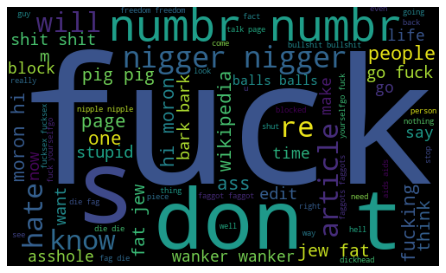

In [20]:
plt.imshow(add)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

<AxesSubplot:title={'center':' shows precentage of types of comments'}, ylabel='count'>

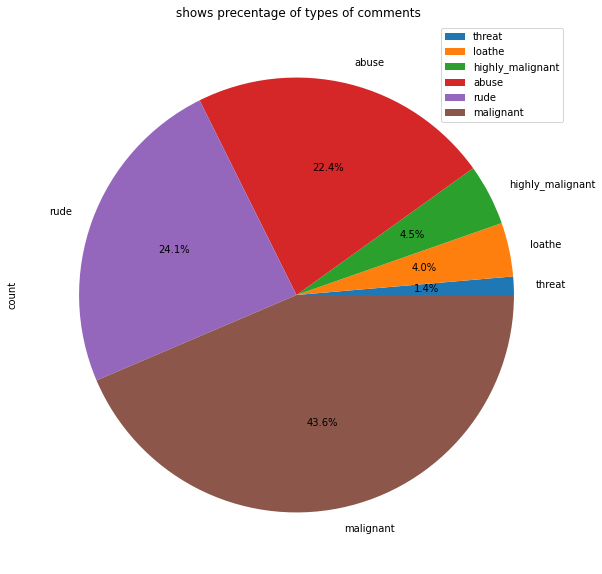

In [24]:
plot = train[col]. sum()\
                   .to_frame()\
                   .rename(columns={0: "count"})\
                   .sort_values("count")
plot.plot.pie( y = "count" , title = " shows precentage of types of comments" , autopct='%1.1f%%' , figsize = (10,10))


### we can see the highest is malignant comments 

In [27]:
from nltk.stem import WordNetLemmatizer


In [28]:
from nltk.stem import PorterStemmer

In [29]:
lematizer  = WordNetLemmatizer()

In [30]:
lematizer

<WordNetLemmatizer>

In [31]:
stemer = PorterStemmer()

### lematizer for train data

In [32]:
lem=WordNetLemmatizer()
train['comment_text'] = train['comment_text'].apply(lambda x: ' '.join(
 lem.lemmatize(t) for t in x.split()))

In [33]:
lem=WordNetLemmatizer()
test['comment_text'] = test['comment_text'].apply(lambda x: ' '.join(
 lem.lemmatize(t) for t in x.split()))

#  creating x and y 

In [34]:
x = train.drop(["malignant"] , axis = 1)

In [35]:
y = train["malignant"]

#  TfidfVectorizer

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer( stop_words='english')
features = tf_vec.fit_transform(train['comment_text'])
x = features

# training data

In [38]:

from sklearn.linear_model import LogisticRegression
ln =  LogisticRegression()
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)  


In [41]:
y_train.shape,y_test.shape


((127656,), (31915,))

# logistic regression

In [42]:
for i in range (0,100):
    x_train,x_test,y_train,y_test = train_test_split( x , y , random_state = i , test_size = .2)
    ln.fit(x_train,y_train)
    pred_train = ln.predict(x_train)
    pred_test = ln.predict(x_test)
    print("at random state",i,"model preforms best")
    print("at random_state =  " ,i)
    print("training score at" ,i, "is " ,accuracy_score(y_train, pred_train)*100)
    print(" testing  score is " ,i, "is" , accuracy_score(y_test, pred_test)*100,"\n")

at random state 0 model preforms best
at random_state =   0
training score at 0 is  96.00097136053142
 testing  score is  0 is 95.45981513394956 

at random state 1 model preforms best
at random_state =   1
training score at 1 is  96.01898853167889
 testing  score is  1 is 95.35014883283722 

at random state 2 model preforms best
at random_state =   2
training score at 2 is  96.03622234755906
 testing  score is  2 is 95.40654864483786 

at random state 3 model preforms best
at random_state =   3
training score at 3 is  95.96415366296924
 testing  score is  3 is 95.67288109039637 

at random state 4 model preforms best
at random_state =   4
training score at 4 is  96.02447201854986
 testing  score is  4 is 95.4660817797274 

at random state 5 model preforms best
at random_state =   5
training score at 5 is  95.99313780785862
 testing  score is  5 is 95.55068149772833 

at random state 6 model preforms best
at random_state =   6
training score at 6 is  96.06520649244845
 testing  score i

at random state 55 model preforms best
at random_state =   55
training score at 55 is  96.06677320298301
 testing  score is  55 is 95.34388218705938 

at random state 56 model preforms best
at random_state =   56
training score at 56 is  96.0432725449646
 testing  score is  56 is 95.51621494595018 

at random state 57 model preforms best
at random_state =   57
training score at 57 is  96.03387228175723
 testing  score is  57 is 95.54754817483942 

at random state 58 model preforms best
at random_state =   58
training score at 58 is  96.05580622924109
 testing  score is  58 is 95.39401535328216 

at random state 59 model preforms best
at random_state =   59
training score at 59 is  95.99078774205678
 testing  score is  59 is 95.59454801817327 

at random state 60 model preforms best
at random_state =   60
training score at 60 is  96.03857241336091
 testing  score is  60 is 95.30941563528121 

at random state 61 model preforms best
at random_state =   61
training score at 61 is  96.03308

In [46]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state= 75)  
ln.fit(x_train,y_train)
pred_train = ln.predict(x_train)
pred_test = ln.predict(x_test)
print("accuracy for  training ",accuracy_score(y_train, pred_train))
print("accuracy for  testing ", accuracy_score(y_test, pred_test))

accuracy for  training  0.9603387228175723
accuracy for  testing  0.9545041516528279


In [47]:

print(classification_report(y_test, pred_test))
print(confusion_matrix ( y_test, pred_test ),"\n")


              precision    recall  f1-score   support

           0       0.96      1.00      0.98     28856
           1       0.93      0.57      0.71      3059

    accuracy                           0.95     31915
   macro avg       0.94      0.78      0.84     31915
weighted avg       0.95      0.95      0.95     31915

[[28722   134]
 [ 1318  1741]] 



In [52]:
from  sklearn.naive_bayes  import   MultinomialNB
nb =  MultinomialNB()

In [54]:
for i in range (0,100):
    x_train,x_test,y_train,y_test = train_test_split( x , y , random_state = i , test_size = .2)
    nb.fit(x_train,y_train)
    pred_train = nb.predict(x_train)
    pred_test = nb.predict(x_test)
    print("at random state",i,"model preforms best")
    print("training score at" ,i, "is " ,accuracy_score(y_train, pred_train)*100)
    print(" testing  score is " ,i, "is" , accuracy_score(y_test, pred_test)*100,"\n")

at random state 0 model preforms best
training score at 0 is  92.44297173654196
 testing  score is  0 is 92.0006266645778 

at random state 1 model preforms best
training score at 1 is  92.42965469699818
 testing  score is  1 is 92.01942660191132 

at random state 2 model preforms best
training score at 2 is  92.4531553550166
 testing  score is  2 is 92.02569324768918 

at random state 3 model preforms best
training score at 3 is  92.38187002569406
 testing  score is  3 is 92.3452921823594 

at random state 4 model preforms best
training score at 4 is  92.42417121012721
 testing  score is  4 is 92.11655961146796 

at random state 5 model preforms best
training score at 5 is  92.37325311775396
 testing  score is  5 is 92.32649224502585 

at random state 6 model preforms best
training score at 6 is  92.42730463119634
 testing  score is  6 is 92.16355945480181 

at random state 7 model preforms best
training score at 7 is  92.45863884188758
 testing  score is  7 is 92.06642644524518 

at 

at random state 65 model preforms best
training score at 65 is  92.34270226233001
 testing  score is  65 is 92.52075826413912 

at random state 66 model preforms best
training score at 66 is  92.40615403897976
 testing  score is  66 is 92.18549271502428 

at random state 67 model preforms best
training score at 67 is  92.43200476280002
 testing  score is  67 is 92.22622591258029 

at random state 68 model preforms best
training score at 68 is  92.39440370997055
 testing  score is  68 is 92.31709227635908 

at random state 69 model preforms best
training score at 69 is  92.46725574982766
 testing  score is  69 is 91.98182672724424 

at random state 70 model preforms best
training score at 70 is  92.40537068371248
 testing  score is  70 is 92.10089299702334 

at random state 71 model preforms best
training score at 71 is  92.46333897349126
 testing  score is  71 is 91.80949396835344 

at random state 72 model preforms best
training score at 72 is  92.38970357836686
 testing  score is  72

In [58]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state= 75)  
nb.fit(x_train,y_train)
pred_train = nb.predict(x_train)
pred_test = nb.predict(x_test)
print("accuracy for  training ",accuracy_score(y_train, pred_train))
print("accuracy for  testing ", accuracy_score(y_test, pred_test))

accuracy for  training  0.924492385786802
accuracy for  testing  0.9207895973680088


In [55]:

print(classification_report(y_test, pred_test))
print(confusion_matrix ( y_test, pred_test ),"\n")


              precision    recall  f1-score   support

           0       0.92      1.00      0.96     28923
           1       0.99      0.18      0.30      2992

    accuracy                           0.92     31915
   macro avg       0.95      0.59      0.63     31915
weighted avg       0.93      0.92      0.90     31915

[[28916     7]
 [ 2456   536]] 



#   grid search 

In [60]:

from sklearn.model_selection import KFold

from sklearn.model_selection import cross_val_score


In [63]:
param_grid = {"penalty" :["l1", "l2", "elasticnet"],  }
from sklearn.model_selection import GridSearchCV

ln = LogisticRegression ()
clf = GridSearchCV(ln,param_grid)
clf.fit(x_train , y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2', 'elasticnet']})

In [64]:
print(clf.best_params_)

{'penalty': 'l2'}


In [65]:
ln = LogisticRegression(penalty = "l2" )

In [66]:
for i in range (0,100):
    x_train,x_test,y_train,y_test = train_test_split( x , y , random_state = i , test_size = .2)
    ln.fit(x_train,y_train)
    pred_train = ln.predict(x_train)
    pred_test = ln.predict(x_test)
    print("at random state",i,"model preforms best")
    print("at random_state =  " ,i)
    print("training score at" ,i, "is " ,accuracy_score(y_train, pred_train)*100)
    print(" testing  score is " ,i, "is" , accuracy_score(y_test, pred_test)*100,"\n")

at random state 0 model preforms best
at random_state =   0
training score at 0 is  96.00097136053142
 testing  score is  0 is 95.45981513394956 

at random state 1 model preforms best
at random_state =   1
training score at 1 is  96.01898853167889
 testing  score is  1 is 95.35014883283722 

at random state 2 model preforms best
at random_state =   2
training score at 2 is  96.03622234755906
 testing  score is  2 is 95.40654864483786 

at random state 3 model preforms best
at random_state =   3
training score at 3 is  95.96415366296924
 testing  score is  3 is 95.67288109039637 

at random state 4 model preforms best
at random_state =   4
training score at 4 is  96.02447201854986
 testing  score is  4 is 95.4660817797274 

at random state 5 model preforms best
at random_state =   5
training score at 5 is  95.99313780785862
 testing  score is  5 is 95.55068149772833 

at random state 6 model preforms best
at random_state =   6
training score at 6 is  96.06520649244845
 testing  score i

at random state 55 model preforms best
at random_state =   55
training score at 55 is  96.06677320298301
 testing  score is  55 is 95.34388218705938 

at random state 56 model preforms best
at random_state =   56
training score at 56 is  96.0432725449646
 testing  score is  56 is 95.51621494595018 

at random state 57 model preforms best
at random_state =   57
training score at 57 is  96.03387228175723
 testing  score is  57 is 95.54754817483942 

at random state 58 model preforms best
at random_state =   58
training score at 58 is  96.05580622924109
 testing  score is  58 is 95.39401535328216 

at random state 59 model preforms best
at random_state =   59
training score at 59 is  95.99078774205678
 testing  score is  59 is 95.59454801817327 

at random state 60 model preforms best
at random_state =   60
training score at 60 is  96.03857241336091
 testing  score is  60 is 95.30941563528121 

at random state 61 model preforms best
at random_state =   61
training score at 61 is  96.03308

In [67]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state= 75)  
ln.fit(x_train,y_train)
pred_train = ln.predict(x_train)
pred_test = ln.predict(x_test)
print("accuracy for  training ",accuracy_score(y_train, pred_train))
print("accuracy for  testing ", accuracy_score(y_test, pred_test))

accuracy for  training  0.9603387228175723
accuracy for  testing  0.9545041516528279


In [68]:

print(classification_report(y_test, pred_test))
print(confusion_matrix ( y_test, pred_test ),"\n")


              precision    recall  f1-score   support

           0       0.96      1.00      0.98     28856
           1       0.93      0.57      0.71      3059

    accuracy                           0.95     31915
   macro avg       0.94      0.78      0.84     31915
weighted avg       0.95      0.95      0.95     31915

[[28722   134]
 [ 1318  1741]] 



### the logistic regression the best model with
### accuracy for  testing  0.9545041516528279

In [70]:


from sklearn.model_selection import cross_val_score
for j in range(2,10):
    ls_score = (cross_val_score(ln,x,y,cv =  j ))
    lsc =  ls_score.mean()
    print("at cv :" , j)
    print("cross validation score is :" , lsc*100)
    print("\n")

at cv : 2
cross validation score is : 95.19336208439798


at cv : 3
cross validation score is : 95.38324616784006


at cv : 4
cross validation score is : 95.4490474995646


at cv : 5
cross validation score is : 95.50356890425331


at cv : 6
cross validation score is : 95.52174215327321


at cv : 7
cross validation score is : 95.53239630312468


at cv : 8
cross validation score is : 95.53866242107311


at cv : 9
cross validation score is : 95.54054199585303




## 
### at cv : 9
### cross validation score is : 95.54054199585303



In [71]:

from sklearn.metrics  import roc_curve,auc

y_precict_proba = clf.predict_proba(x_test)[:,1]
fpr , tpr , threshold = roc_curve(y_test,y_precict_proba )
roc_auc  =  auc(fpr,tpr)
roc_auc

0.9667104653667776

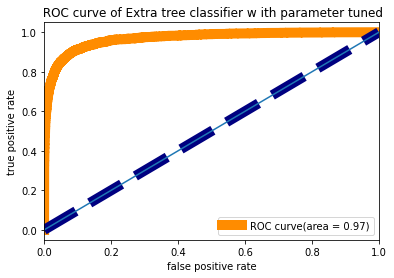

In [72]:
plt.figure()
plt.plot(fpr,tpr,color ="darkorange",lw = 10, label = "ROC curve(area = %0.2f)"%roc_auc)
plt.plot([0,1],[0,1]  , color = "navy" , lw = 10 ,  linestyle = "--" )
plt.xlim ([0.0 ,1.0] )
plt.plot([0.0 , 1.0])
plt.xlabel("false positive rate" )
plt.ylabel("true positive rate" )
plt.title (" ROC curve of Extra tree classifier w ith parameter tuned")
plt.legend(loc="lower right")


plt.show()

In [73]:
import pickle
filename = "comment.pkl"
pickle.dump(ln, open(filename,"wb"))

# predicting comment

In [81]:
pickled_model = pickle.load(open('comment.pkl', 'rb'))
pred = pickled_model.predict(x)

In [76]:
test

,id,comment_text
0,00001cee341fdb12,yo bitch ja rule is more succesful then you ll...
1,0000247867823ef7,from rfc the title is fine a it is imo
2,00013b17ad220c46,source zawe ashton on lapland
3,00017563c3f7919a,if you have a look back at the source the info...
4,00017695ad8997eb,i don t anonymously edit article at all
...,...,...
153159,fffcd0960ee309b5,i totally agree this stuff is nothing but too ...
153160,fffd7a9a6eb32c16,throw from out field to home plate doe it get ...
153161,fffda9e8d6fafa9e,okinotorishima category i see your change and ...
153162,fffe8f1340a79fc2,one of the founding nation of the eu germany h...


In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer( max_features=170096,  stop_words='english')
features = tf_vec.fit_transform(test['comment_text'])
x = features

In [82]:

pred = pd.DataFrame(pred)
pred

,0
0,0
1,0
2,0
3,0
4,0
...,...
153159,0
153160,0
153161,0
153162,0


In [84]:
pred.to_excel( "prediction.xlsx" ) 
